TASK 1

IRIS FLOWER CLASSIFICATION

In [ ]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/Iris.csv')

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

VISUALIZATION

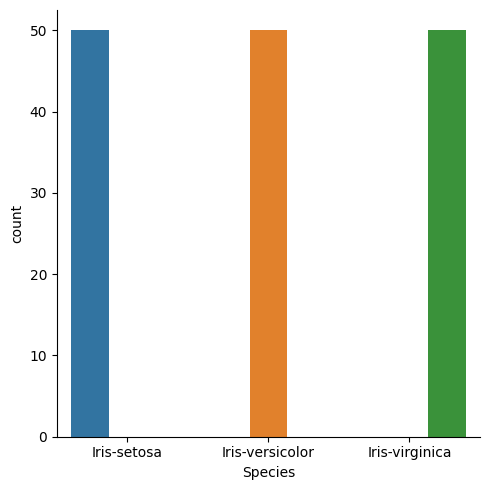

In [ ]:
#catplot
sns.catplot(x = 'Species',hue = 'Species',kind = 'count',data = df)

<BarContainer object of 150 artists>

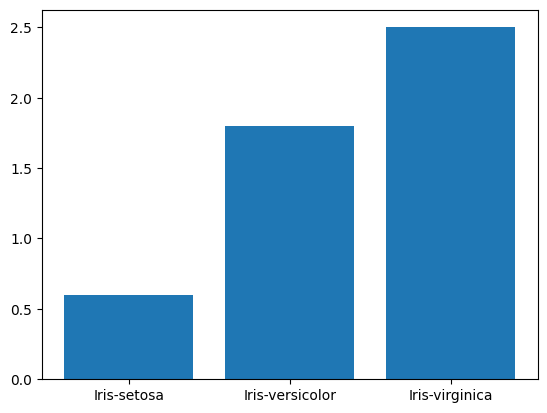

In [ ]:
#Bar plot
plt.bar(df['Species'],df['PetalWidthCm'])

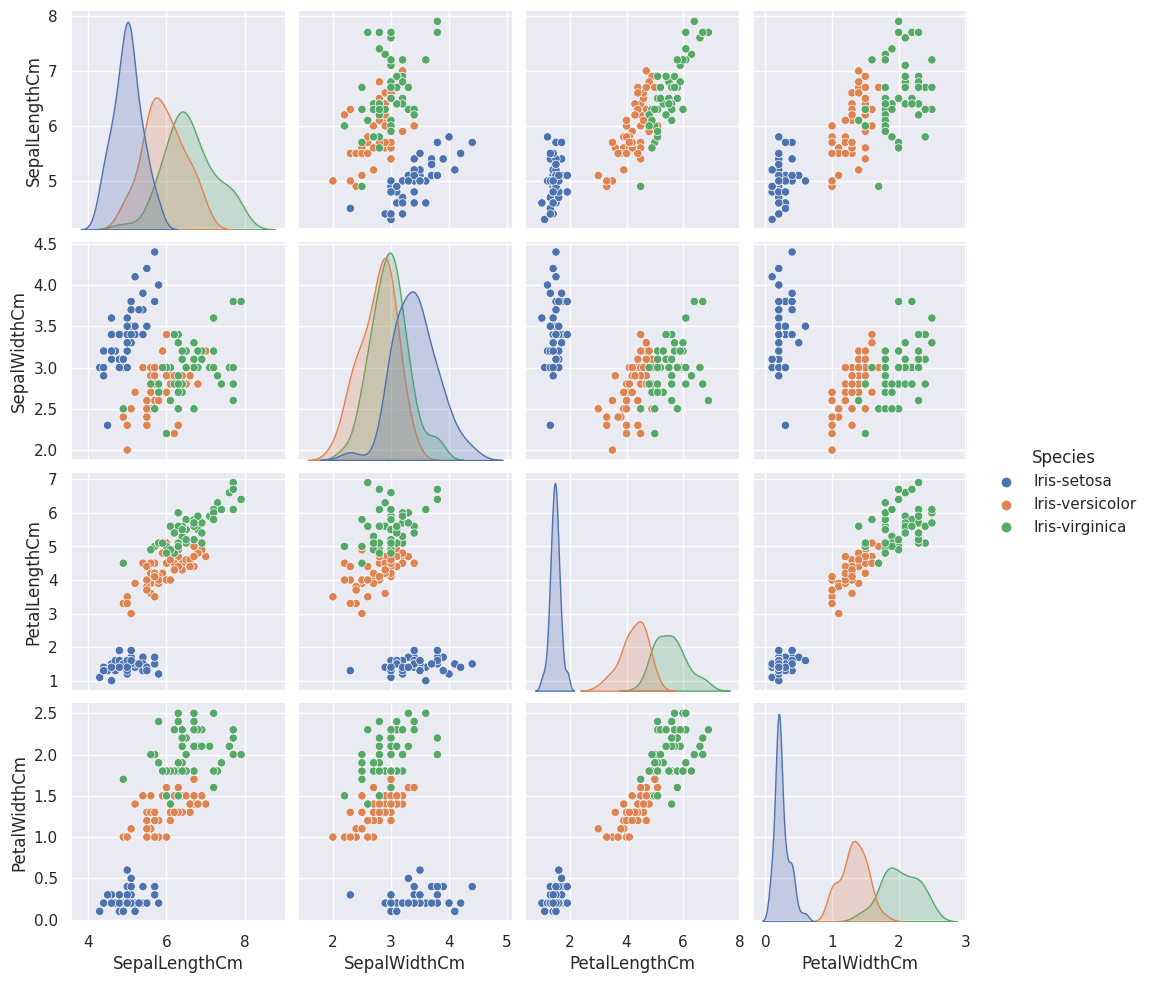

In [ ]:
sns.set()
sns.pairplot(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']],hue ="Species",diag_kind = "kde")

DATA PROCESSING

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


ENCODING THE CATEGORICAL FEATURE AS A ONE-HOT NUMERIC FEATURE

In [ ]:
Label_Encode = LabelEncoder()
Y = df['Species']
Y = Label_Encode.fit_transform(Y)

In [ ]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
df['Species'].nunique()

3

In [ ]:
 X = np.array(df[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']])

In [ ]:
X

SPLITTING THE DATASET

In [ ]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 0)

In [ ]:
X_train

In [ ]:
X_train.shape

(105, 4)

In [ ]:
X_test.shape

(45, 4)

In [ ]:
y_train.shape

(105,)

In [ ]:
y_test.shape

(45,)

MODELLING

Decision Tree Algorithm

In [ ]:
X_train.size

420

In [ ]:
y_train.size

105

In [ ]:
from sklearn import tree
D_tree = tree.DecisionTreeClassifier()
D_tree.fit(X_train,y_train)


DecisionTreeClassifier()

In [ ]:
pred_tree = D_tree.predict(X_test)
accuracy = accuracy_score(y_test,pred_tree)*100 

In [ ]:
accuracy

97.77777777777777